# Introduction

## Background
Proteins are complex biomolecules made up of amino acids. Their functions are heavily influenced by their structures, which is determind by the process of protein folding. Protein folding involves multiple layers, starting with primary structures folding into secondary structures, followed by tertiary structures, and finally, quaternary structures (if the protein involves more than 1 polypeptide chain).

Breaking down the layers of protein folding is useful in providing better insights into how the different parts of the protein interact during the folding process. Therefore, our project focuses on the first layer of folding: secondary structures. Visualising these structures is essential as it allows us to see their spatial arrangement, bringing us closer to understanding their shape, function and interactions with each other and other molecules. 

Hence, our project's overall aim is to identify and visualise the secondary structures of a protein, given its original DNA sequence.

## RCSB PDB Database and BLAST 
PDB: Protein Data Bank

BLAST: Basic Local Alignment Search Tool

Protein structure can be determined experimentally through a variety of techniques like X-ray diffraction and multi-dimensional NMR (Breda et al., 2007). These methods enable scientists to map proteins at an atomic level by determining the x, y, z coordinates of each atom. Once mapped, these atomic coordinates are stored in databases such as the PDB (Protein Data Bank). These databases provide a quick way to visualise protein structures given their amino acid sequence. Proteins in these databases are indexed, as a protein's data is stored according to its protein ID. Thus, if only the amino acid sequence is provided, we face an issue where we cannot directly determine its protein ID and corresponding structure. 

This is where tools like BLAST come in handy. BLAST is a useful tool that compares amino acid sequences against a reference database (PDB) to find the most similar protein. This gives us the protein ID that lets us obtain information about our target protein structure from the database.                                                                                                                                                                                                                                                
## DDSP for Secondary Structure Annotation
DSSP: Dictionary of Secondary Structure of Proteins

The DSSP is a database of secondary structures, which uses an algorithm to assign types of secondary structures for all proteins in the PDB.
The types of secondary structures are assigned in a standard way, where each type is represented by a specific letter (Table 1).

<h5><center>Table 1: Secondary structure type annotation (Biopython.org, n.d.)</center></h5>

|Letter assignment|Structure type|
|:---|:---|
|H|Alpha helix (4-12)|
|B|Isolated beta-bridge residue|
|E|Strand|
|G|3-10 helix|
|I|Pi helix|
|T|Turn|
|S|Bend|
|-|None|

# Computational Approach

To achieve our goal of visualising the 3D structure of a protein given its corresponding DNA sequence, we perform the following steps:
1. Convert the target DNA sequence into its corresponding amino acid sequence
2. BLAST: Compare the amino acid sequence against sequences in the PDB to find its corresponding protein and retrieve the .pdb file of the protein
4. Identify the secondary structures of the protein using the DSSP algorithm
5. Visualise the protein's 3D structure with the secondary structures identified by DSSP outlined in different colours

# User Guide

The code in this notebook is demonstrated using the human haemoglobin beta-globin. The table below provides a summary of the key details regarding the protein (RCSB.org, n.d.) (NCBI, n.d.).

| Characteristic | Details |
| :------- | :------ |
| Name | Haemoglobin beta-globin (Homo sapiens) |
| PDB ID | [1DXT](https://www.rcsb.org/structure/1DXT) |
| DNA sequence | [ATGGTGCATCTGACC<br>CCGGAAGAAAAAAGC<br>GCGGTGACCGCGCTG<br>TGGGGCAAAGTGAAC<br>GTGGATGAAGTGGGC<br>GGCGAAGCGCTGGGC<br>CGCCTGCTGGTGGTG<br>TATCCGTGGACCCAG<br>CGCTTTTTTGAAAGC<br>TTTGGCGATCTGAGC<br>ACCCCGGATGCGGTG<br>ATGGGCAACCCGAAA<br>GTGAAAGCGCATGGC<br>AAAAAAGTGCTGGGC<br>GCGTTTAGCGATGGC<br>CTGGCGCATCTGGAT<br>AACCTGAAAGGCACC<br>TTTGCGACCCTGAGC<br>GAACTGCATTGCGAT<br>AAACTGCATGTGGAT<br>CCGGAAAACTTTCGC<br>CTGCTGGGCAACGTG<br>CTGGTGTGCGTGCTG<br>GCGCATCATTTTGGC<br>AAAGAATTTACCCCG<br>CCGGTGCAGGCGGCG<br>TATCAGAAAGTGGTG<br>GCGGGCGTGGCGAAC<br>GCGCTGGCGCATAAA<br>TATCAT](https://www.ncbi.nlm.nih.gov/nuccore/DQ126274) |
| Amino acid sequence | [MVHLTPEEKSAVTAL<br>WGKVNVDEVGGEALG<br>RLLVVYPWTQRFFES<br>FGDLSTPDAVMGNPK<br>VKAHGKKVLGAFSDG<br>LAHLDNLKGTFATLS<br>ELHCDKLHVDPENFR<br>LLGNVLVCVLAHHFG<br>KEFTPPVQAAYQKVV<br>AGVANALAHKYH](https://www.ncbi.nlm.nih.gov/nuccore/DQ126274) |

# Part 1: Converting a DNA sequence into an amino acid sequence

A function to convert a DNA sequence into an amino acid sequence is defined, where the input (DNA sequence) is first converted to an mRNA sequence and subsequently to an amino acid acid sequence. A dictionary for the codon chart is defined, where each mRNA codon corresponds to an amino acid.

In [1]:
codon_chart = {'AUG': 'M', 'UAA': 'STOP', 'UAG': 'STOP', 'UGA': 'STOP', 
               'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L',
               'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S',
              'UAU': 'Y', 'UAC': 'Y', 'UGU': 'C', 'UGC': 'C', 'UGG': 'W',
              'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
              'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
              'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
              'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
              'AUU': 'I', 'AUC': 'I', 'AUA': 'I',
              'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
              'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
              'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
              'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
              'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
              'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
              'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'}

dna_seq = input('Please type your DNA sequence:')
def dnaseq_aminoacidseq(dna_seq):
    """
    Function that converts a DNA sequence into an amino acid sequence, assumes the first codon in mRNA is the start codon.
    Input: DNA sequence as a string, with all letters capitalised and no spaces
    Output: Amino acid sequence as a string
    """
    mrna_seq = dna_seq.replace('T', 'U') # Converting to mRNA sequence
    amino_acids = []
    for i in range(0, len(mrna_seq), 3): # Range from 1st to last index of mRNA sequence, in steps of 3 (1 codon is made of 3 nucleotides)
        codon = mrna_seq[i:i+3]
        if codon in codon_chart:
            amino_acid = codon_chart[codon]
            if amino_acid == 'STOP':
                break
            amino_acids.append(amino_acid)
    amino_acids_string = ''.join([str(element) for element in amino_acids]) # Converting list to string
    return amino_acids_string

amino_acid_seq = dnaseq_aminoacidseq(dna_seq)
print(f"Here is your amino acid sequence: {amino_acid_seq}")

Please type your DNA sequence: ATGGTGCATCTGACCCCGGAAGAAAAAAGCGCGGTGACCGCGCTGTGGGGCAAAGTGAACGTGGATGAAGTGGGCGGCGAAGCGCTGGGCCGCCTGCTGGTGGTGTATCCGTGGACCCAGCGCTTTTTTGAAAGCTTTGGCGATCTGAGCACCCCGGATGCGGTGATGGGCAACCCGAAAGTGAAAGCGCATGGCAAAAAAGTGCTGGGCGCGTTTAGCGATGGCCTGGCGCATCTGGATAACCTGAAAGGCACCTTTGCGACCCTGAGCGAACTGCATTGCGATAAACTGCATGTGGATCCGGAAAACTTTCGCCTGCTGGGCAACGTGCTGGTGTGCGTGCTGGCGCATCATTTTGGCAAAGAATTTACCCCGCCGGTGCAGGCGGCGTATCAGAAAGTGGTGGCGGGCGTGGCGAACGCGCTGGCGCATAAATATCAT


Here is your amino acid sequence: MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH


# Part 2: Protein BLAST

The Biopython library is used to perform a BLAST search for the amino acid sequence obtained in Part 1 against the PDB (Protein Data Bank) database. The results of the BLAST search are stored in a file called `my_blast.xml`, which is stored in the same folder as this notebook. The first hit of the BLAST record is printed.

In [2]:
from Bio import Blast # BLAST module from Biopython

result_stream = Blast.qblast('blastp', 'pdb', amino_acid_seq)
# qblast passes sequence data as the main parameter
# Internal programme: blastp for protein. Otherwise, blastn is for nucleotides
# Database: pdb to access .pdb files only
# Results are given in XML format by default

with open("my_blast.xml", "wb") as out_stream:
    out_stream.write(result_stream.read())
# wb: File is opened in write-binary mode
# Results are read and written to a file

result_stream = open("my_blast.xml", "rb")
# rb: File is opened in read-binary mode

blast_record = Blast.read(result_stream)
# File is opened and read in BLAST

print(blast_record[0][0],'\n\n', blast_record[0].target.name) 
# Accesses the first record (though there is only 1 query in this example) and first hit
# Accesses the sequence name/ identifier 

Query : Query_4342269 Length: 147 Strand: Plus
        unnamed protein product
Target: pdb|1DXT|B Length: 147 Strand: Plus
        Chain B, HEMOGLOBIN (DEOXY) (BETA CHAIN) [Homo sapiens] >pdb|1DXT|D
        Chain D, HEMOGLOBIN (DEOXY) (BETA CHAIN) [Homo sapiens] >pdb|6KYE|B
        Chain B, Hemoglobin subunit beta [Homo sapiens] >pdb|6KYE|D Chain D,
        Hemoglobin subunit beta [Homo sapiens] >pdb|6KYE|F Chain F, Hemoglobin
        subunit beta [Homo sapiens] >pdb|6KYE|H Chain H, Hemoglobin subunit beta
        [Homo sapiens] >pdb|6KYE|J Chain J, Hemoglobin subunit beta [Homo
        sapiens] >pdb|6KYE|L Chain L, Hemoglobin subunit beta [Homo sapiens]
        >pdb|7CUE|B Chain B, Hemoglobin subunit beta [Homo sapiens] >pdb|7CUE|D
        Chain D, Hemoglobin subunit beta [Homo sapiens] >pdb|7UD7|B Chain B,
        Hemoglobin subunit beta [Homo sapiens] >pdb|7UD7|D Chain D, Hemoglobin
        subunit beta [Homo sapiens] >pdb|7UD8|B Chain B, Hemoglobin subunit beta
        [Homo sapien

## Note:
As we are accessing an online database, the output may take from 5-10 minutes to load. Here are screenshots of the output for your reference in case it does not load:

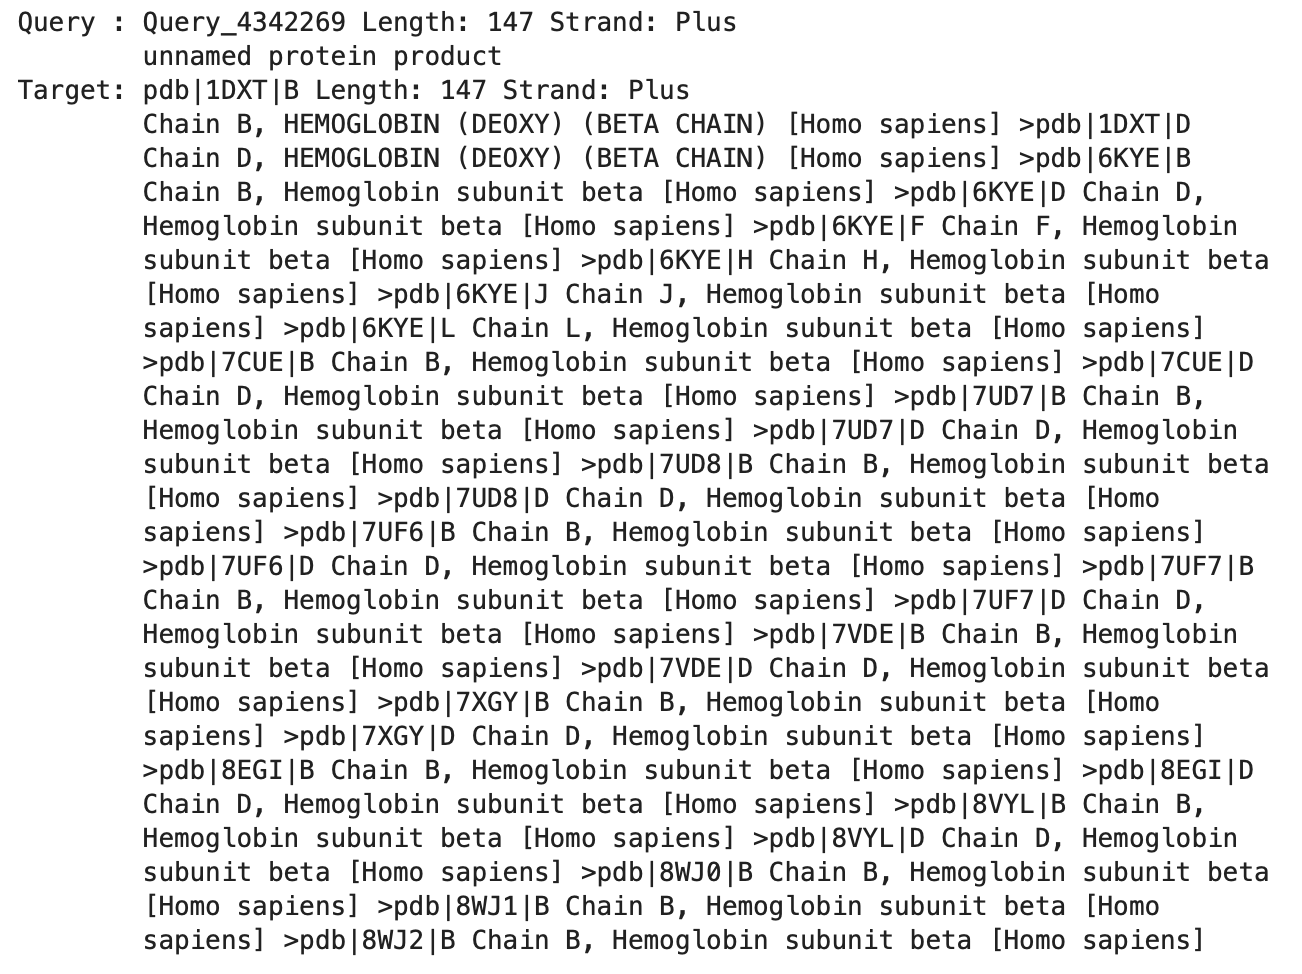
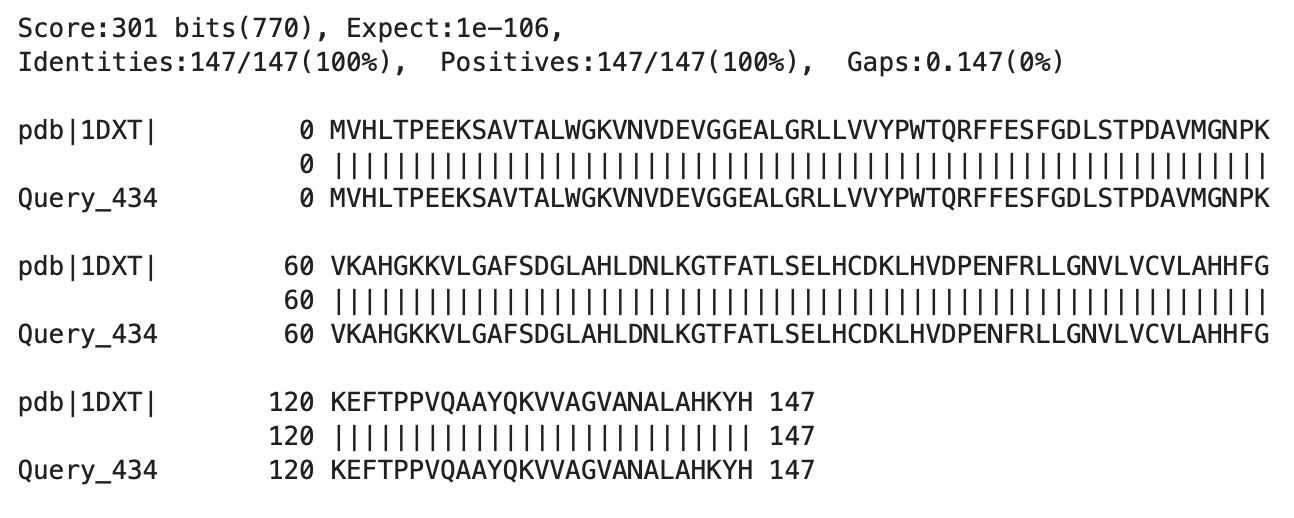

# Part 3: Extracting information on secondary structure assignment using DSSP

The BLAST results in Part 2 provides us with the PDB ID of the protein, which is used to obtain the 3D structure of the protein from the PDB database. The 3D structure of the protein is stored in a .pdb file in the same folder as this notebook. Following this, the DSSP algorithm is used to identify the secondary structures of the protein. The assignment of each residue to a secondary structure type is printed for the user to see.

In [3]:
from biopandas.pdb import PandasPdb
from Bio.PDB import PDBParser, DSSP

pdbid = blast_record[0].target.name.split('_')[0] # Extracting the PDB ID
ppdb = PandasPdb().fetch_pdb(pdbid) # Fetching the PDB file
file_path = f'{pdbid}.pdb' # Saving the PDB file
ppdb.to_pdb(path = file_path)

# Loading the PDB file
parser = PDBParser()
structure = parser.get_structure(pdbid, file_path)

# Creating DSSP object from PDB file
dssp = DSSP(structure[0], file_path) # Each PDB file can have multiple models, so [0] accesses the 1st model

# Accessing data from DSSP
for key in dssp.keys(): # Each key represents 1 residue
    residue = dssp[key] # Each residue contains data of multiple characteristics of the residue
    residue_id = residue[0] # Accesses 1st element of the residue data (residue identity by number) 
    secondary_structure = residue[2]  # Accesses secondary structure assignment in residue data
    print(f"Residue {residue_id} has secondary structure: {secondary_structure}")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/Users/gabrielle/miniconda3/lib/python3.12/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4903.
  warnings.warn(
/Users/gabrielle/miniconda3/lib/python3.12/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4946.
  warnings.warn(
/Users/gabrielle/miniconda3/lib/python3.12/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4989.
  warnings.warn(
/Users/gabrielle/miniconda3/lib/python3.12/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5032.
  warnings.warn(
/Users/gabrielle/miniconda3/lib/python3.12/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5075.
  warnings.warn(
/Users/gabrielle/miniconda3/lib/python3.12/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstruction

Residue 1 has secondary structure: -
Residue 2 has secondary structure: -
Residue 3 has secondary structure: -
Residue 4 has secondary structure: H
Residue 5 has secondary structure: H
Residue 6 has secondary structure: H
Residue 7 has secondary structure: H
Residue 8 has secondary structure: H
Residue 9 has secondary structure: H
Residue 10 has secondary structure: H
Residue 11 has secondary structure: H
Residue 12 has secondary structure: H
Residue 13 has secondary structure: H
Residue 14 has secondary structure: H
Residue 15 has secondary structure: H
Residue 16 has secondary structure: H
Residue 17 has secondary structure: H
Residue 18 has secondary structure: G
Residue 19 has secondary structure: G
Residue 20 has secondary structure: G
Residue 21 has secondary structure: H
Residue 22 has secondary structure: H
Residue 23 has secondary structure: H
Residue 24 has secondary structure: H
Residue 25 has secondary structure: H
Residue 26 has secondary structure: H
Residue 27 has second

# Part 4: Visualisation using NGLView

Having identified the 3D structure and the secondary structures of the protein, the protein is visualised using NGLView. Each secondary structure type is visualised in a different colour outline. The colours used are given in the following table:

Letter assignment|Structure type|Colour|
|:---|:---|:---|
|H|Alpha helix (4-12)|Purple|
|B|Isolated beta-bridge residue|Green|
|E|Strand|Orange|
|G|3-10 helix|Pink|
|I|Pi helix|Blue|
|T|Turn|Red|
|S|Bend|Gray|
|-|None|White|

In [4]:
import nglview as nv
# Creating a dictionary of colours assigned to each secondary structure type
colour_dict = {'H': 'purple',
             'B': 'green',
             'E': 'orange',
             'G': 'pink',
             'I': 'blue',
             'T': 'red',
             'S': 'gray',
              '-': 'white'}

# Creating visualisation
view = nv.show_file(file_path)
view.add_representation('ribbon')

for key in dssp.keys(): # Each key represents 1 residue
    residue = dssp[key] # Each residue contains data of multiple characteristics of the residue
    residue_number = residue[0] # Accesses 1st element of the residue data (residue identity by number) 
    secondary_structure = residue[2]  # Accesses secondary structure assignment in residue data
    colour = colour_dict[secondary_structure] # Access corresponding colour to sec structure assignment
    view.update_representation(sele="residue" + str(residue_number), color=colour) # Tells python to access the residue, and then select the residue number
view

NGLWidget()

# Conclusion

To summarise, our project provides a computational approach to streamlining processes that enable one to visualise the 3D conformation of proteins, given their original DNA sequence. In our solution, we found the amino acid sequence of the Human Haemoglobin B-globinand BLASTed it to find similar sequences in the PDB database in order to determine its 3D structure. Following sequence alignment, we used DSSP to identify its secondary structures. Finally, we used NGLviewer to visualise the 3D structure, which is color-coded for each secondary structure type. 

# References

1. Add a selection — addSelection. (n.d.). https://nvelden.github.io/NGLVieweR/reference/addSelection.html
2. Bio.PDB.DSSP module — Biopython 1.75 documentation. (n.d.). https://biopython.org/docs/1.75/api/Bio.PDB.DSSP.html
3. Biopython. (n.d.). https://lin-chen-langley.github.io/Python/Biopython.htm
4. Breda, A., Valadares N.F., De Souza, O.N., Garratt, R.C. (2007, September 14). *Protein Structure, Modelling and Applications.* Bioinformatics in Tropical Disease Research: A Practical and Case-Study Approach - NCBI Bookshelf. https://www.ncbi.nlm.nih.gov/books/NBK6824/
5. Homo sapiens isolate HbA-Ghn023 beta globin (HBB) gene, complete cds - Nucleotide - NCBI. (n.d.). https://www.ncbi.nlm.nih.gov/nuccore/DQ126274